In [1]:
from matplotlib import pyplot as plt
import cv2
from fl_tissue_model_tools import models
from fl_tissue_model_tools.helper import get_img_mask_paths

2023-02-04 03:38:34.763126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
images_dir = "./test_images"
labels_dir = "./test_masks"
image_mask_paths = get_img_mask_paths(images_dir, labels_dir)
img_paths, mask_paths = zip(*image_mask_paths)

print(f"Found {len(image_mask_paths)} image/label pairs")

Found 1 image/label pairs


In [3]:
model_cfg = "../model_training/binary_segmentation/configs/unet_patch_segmentor_1.json"
model = models.get_unet_patch_segmentor_from_cfg(model_cfg)

In [4]:
sample_num = 0
img = cv2.imread(img_paths[sample_num], 0)
pred, seg = model.predict(img)

  0%|          | 0/8 [00:00<?, ?it/s]2023-02-04 03:38:43.204859: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 5.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-04 03:38:45.913233: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.52GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-04 03:38:45.913270: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.52GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


2/2 [==============================] - 8s 4ms/step


 12%|█▎        | 1/8 [00:09<01:07,  9.65s/it]

2/2 [==============================] - 0s 481ms/step


 25%|██▌       | 2/8 [00:11<00:30,  5.05s/it]

2/2 [==============================] - 1s 489ms/step


 38%|███▊      | 3/8 [00:13<00:17,  3.58s/it]

2/2 [==============================] - 1s 495ms/step


 50%|█████     | 4/8 [00:15<00:11,  2.90s/it]

2/2 [==============================] - 1s 489ms/step


 62%|██████▎   | 5/8 [00:16<00:07,  2.51s/it]

2/2 [==============================] - 0s 483ms/step


 75%|███████▌  | 6/8 [00:18<00:04,  2.28s/it]

2/2 [==============================] - 1s 494ms/step


 88%|████████▊ | 7/8 [00:20<00:02,  2.13s/it]

2/2 [==============================] - 0s 484ms/step


100%|██████████| 8/8 [00:22<00:00,  2.81s/it]


Original image - ./test_images/D8_002.tif


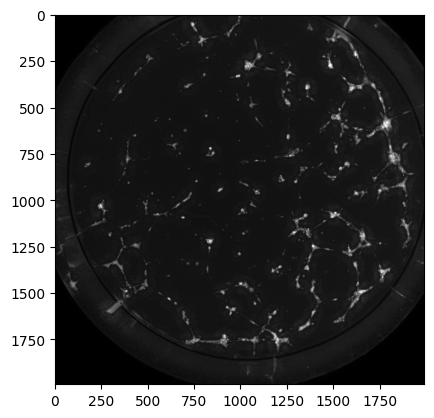

Prediction (unthresholded) - ./test_images/D8_002.tif


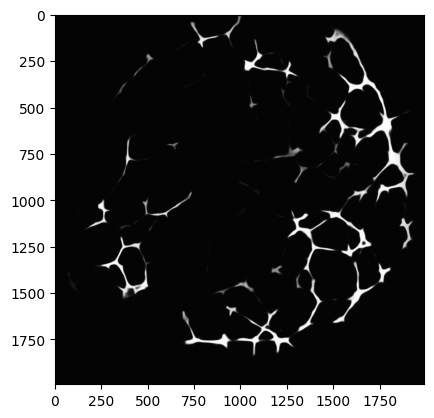

Segmentation - ./test_images/D8_002.tif


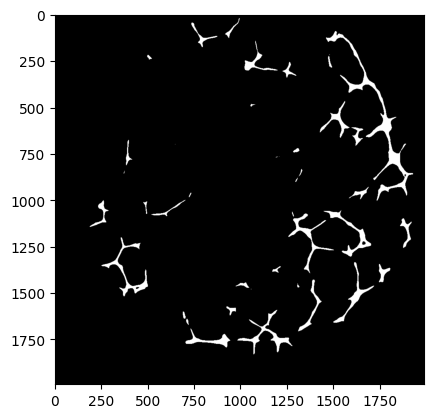

In [5]:
print(f"Original image - {img_paths[sample_num]}")
plt.imshow(img, cmap="gray")
plt.show()
print(f"Prediction (unthresholded) - {img_paths[sample_num]}")
plt.imshow(pred, cmap="gray")
plt.show()
print(f"Segmentation - {img_paths[sample_num]}")
plt.imshow(seg, cmap="gray")
plt.show()